# Level 1: Exploring

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_acct = pd.read_csv('data-set/completedacct.csv')
# df_card = pd.read_csv('data-set/completedcard.csv')
df_client = pd.read_csv('data-set/completedclient.csv')
df_disposition = pd.read_csv('data-set/completeddisposition.csv')
# df_district = pd.read_csv('data-set/completeddistrict.csv')
# df_loan = pd.read_csv('data-set/completedloan.csv')
# df_order = pd.read_csv('data-set/completedorder.csv')
df_trans = pd.read_csv('data-set/completedtrans.csv', low_memory=False)
# df_crm_call = pd.read_csv('data-set/CRM Call Center Logs.csv')
# df_crm_events = pd.read_csv('data-set/CRM Events.csv')
# df_crm_reviews = pd.read_csv('data-set/CRM Reviews.csv')
# df_luxury_loans = pd.read_csv('data-set/LuxuryLoanPortfolio.csv')

1. How many transactions are there in the dataset?

In [3]:
len(df_trans.index)


1056320

2. What is the value of the largest transaction made and to which account/accounts was it made?
    a. Get the name, gender, age, and the city this client lives in

In [4]:
max_amount = df_trans.amount.max()
max_transactions = df_trans.loc[df_trans.amount == max_amount]
[trans_id, account_id] = [max_transactions.iloc[0].trans_id,max_transactions.iloc[0].account_id]
client_id = df_disposition.loc[df_disposition.account_id == account_id].iloc[0].client_id
client = df_client.loc[df_client.client_id == client_id]
print("transaction id: {}\naccount id: {}".format(trans_id,account_id))
client.filter(items=["first","middle", "last", "sex", "age", "city"])


transaction id: T00291346
account id: A00000998


,first,middle,last,sex,age,city
1144,Johanna,Danna,Summers,Female,19,Charleston


3. Which account(s) had the largest balance and what date was this? How does this compare to the balance of this
account to the latest date?

In [5]:
df_trans.fulldate = pd.to_datetime(df_trans.fulldate)
max_balance_amount = df_trans.balance.max()
account = df_trans.query("balance == @max_balance_amount")
[account_id, max_date] = [account.account_id.values[0], account.fulldate.values[0]]

latest_date = df_trans.query("account_id == @account_id").fulldate.max()
latest_balance = df_trans.query("account_id == @account_id and fulldate == @latest_date").balance.values[0]

print("account id: {}\nmax balance: {} at {}\nlatest balance: {} at {}".format(account_id,max_balance_amount,max_date, latest_balance, latest_date))

account id: A00010520
max balance: 209637.0 at 2017-05-06T00:00:00.000000000
latest balance: 28240.1 at 2018-12-31 00:00:00


4. Create a histogram and box plot displaying the amounts distribution

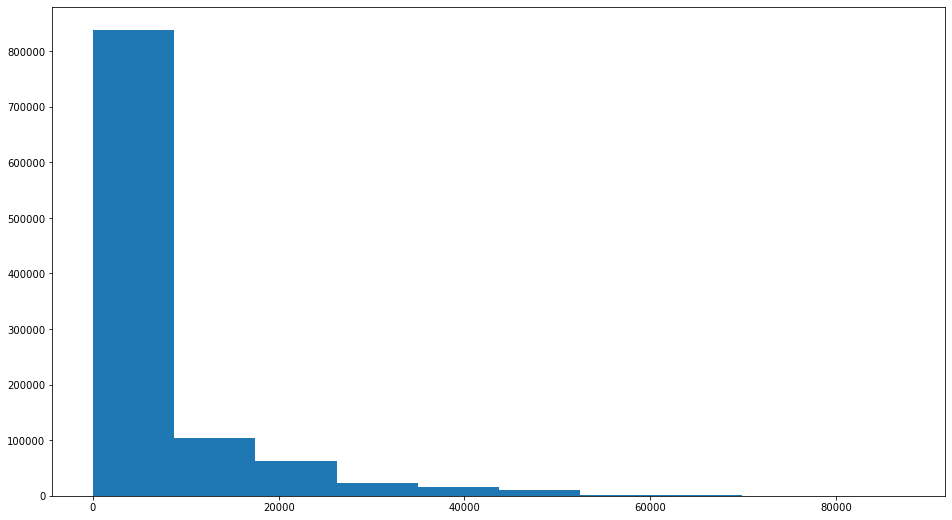

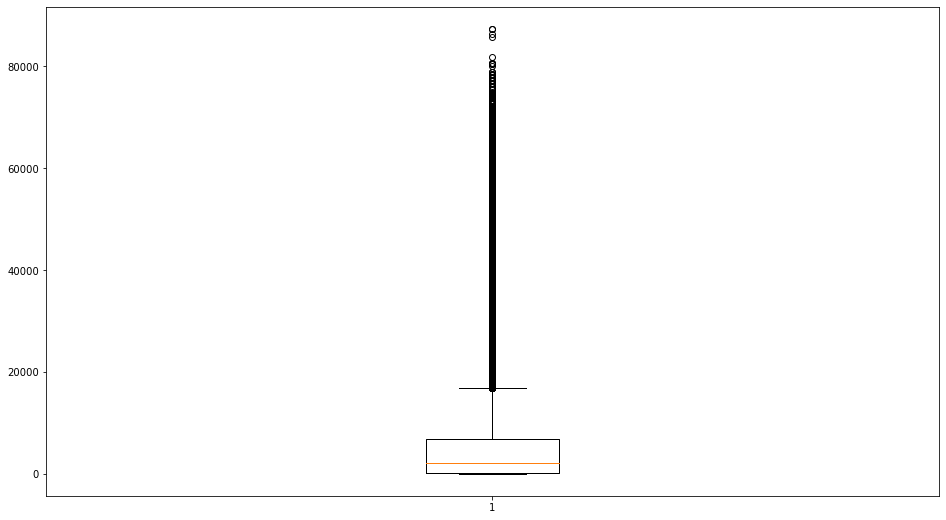

In [6]:
plt.figure(figsize=(16,9))
plt.hist(df_trans.amount)
plt.figure(figsize=(16,9))
plt.boxplot(df_trans.amount)
plt.show()

5. Split the amounts into bins:
a. '<100'
b. '100-250'
c. '250-500'
d. '500-1K'
e. '1K-2K'
f. '2K-4K'
g. '4K-8K'
h. '8K-15K'
i. '15K-30K'
j. '30K-60K'
k. '>60K'

In [7]:
bins = [0,100,250,500,1000,2000,4000,8000,15000,30000,60000,max_amount]
df_trans.amount.value_counts(bins=bins)

(-0.001, 100.0]       225256
(4000.0, 8000.0]      153171
(2000.0, 4000.0]      149539
(100.0, 250.0]        115747
(8000.0, 15000.0]      96549
(15000.0, 30000.0]     95605
(1000.0, 2000.0]       83869
(500.0, 1000.0]        48779
(250.0, 500.0]         46873
(30000.0, 60000.0]     39357
(60000.0, 87400.0]      1575
Name: amount, dtype: int64

6. How many debit and credit transactions are there?


In [8]:
df_trans.type.value_counts()

Debit     651237
Credit    405083
Name: type, dtype: int64

7. What are the different types of transaction operations?

In [9]:
operations = df_trans.operation.unique()
for o in operations:
    print(o)

Credit in Cash
Collection from Another Bank
Cash Withdrawal
nan
Remittance to Another Bank
Credit Card Withdrawal


8. What are the different K Symbol values?


In [10]:
symbols = df_trans.k_symbol.unique()
for s in symbols:
    print(s)

nan
Old Age Pension
Interest Credited
Household
Payment on Statement
 
Insurance Payment
Sanction Interest
Loan Payment


9. Which top/bottom 3 banks have the highest count of transactions?

In [11]:
trans_count = df_trans.groupby("bank").trans_id.count()
print('Top 3\n{}'.format(trans_count.head(3)))
print("\n")
print('Bottom 3\n{}'.format(trans_count.tail(3)))

Top 3
bank
Bank of America                  19597
Bank of New York Mellon Corp.    21167
Capital One                      21711
Name: trans_id, dtype: int64


Bottom 3
bank
TD Bank              22285
U.S. Bancorp         19623
Wells Fargo & Co.    21499
Name: trans_id, dtype: int64


10. Which top/bottom 3 banks have the highest value of transactions?

In [12]:
trans_values = df_trans.groupby("bank").amount.sum()
print('Top 3\n{}'.format(trans_values.head(3)))
print("\n")
print('Bottom 3\n{}'.format(trans_values.tail(3)))

Top 3
bank
Bank of America                  104137717.9
Bank of New York Mellon Corp.    119141947.4
Capital One                      127567388.0
Name: amount, dtype: float64


Bottom 3
bank
TD Bank              117946247.0
U.S. Bancorp          95541231.7
Wells Fargo & Co.    125956293.3
Name: amount, dtype: float64


# Level 2: Analyzing

1. Which Month has the most transactions? Did this differ over the years? Visualize this

month
1    122214


<AxesSubplot:xlabel='month,year'>

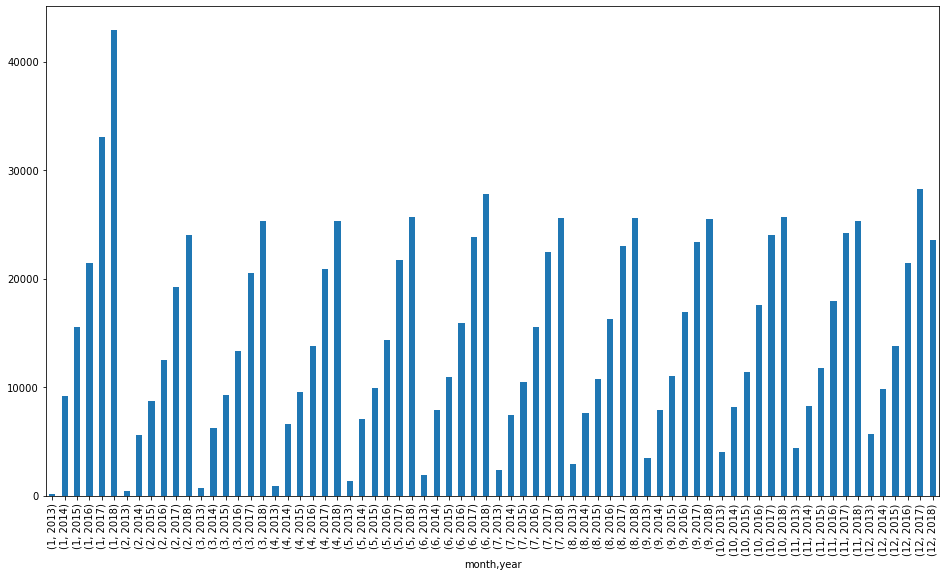

In [62]:
print(df_trans.value_counts("month").sort_values(ascending=False).head(1).to_string())
df_trans.groupby(["month", "year"]).trans_id.count().plot.bar(figsize=(16,9))

2. Which day of the month has the most transactions? Did this differ over the years? Visualize this.

In [106]:
print(df_trans.value_counts("day").sort_values(ascending=False).head(1).to_string())

years = df_trans.groupby(["year", "day"]).size().reset_index()
y_2013 = years.query("year == 2013")
y_2013 = y_2013.rename(columns = {0:'count'})
# y_2013
# y_2013.day.values
y_2013.count
# y_2013.plot.bar(x=y_2013.day, y=y_2013.count)
# y_2013.plot.bar(x=y_2013.day.values, y=y_2013.count.values)
# sns.countplot(x="day", data=y_2013)

# with open('temp.csv', 'w') as f:
#     f.write(y_2013.to_csv())




day
31    202082


<bound method DataFrame.count of     year  day  count
0   2013    1    311
1   2013    2    351
2   2013    3    352
3   2013    4    343
4   2013    5   1227
5   2013    6   1216
6   2013    7   1251
7   2013    8   1133
8   2013    9   1203
9   2013   10   1014
10  2013   11   1130
11  2013   12   1330
12  2013   13   1253
13  2013   14   1213
14  2013   15    390
15  2013   16    391
16  2013   17    398
17  2013   18    473
18  2013   19    324
19  2013   20    353
20  2013   21    369
21  2013   22    370
22  2013   23    347
23  2013   24    385
24  2013   25    336
25  2013   26    340
26  2013   27    322
27  2013   28    412
28  2013   29    298
29  2013   30   3801
30  2013   31   5569>